# Objective:-Use random forest to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

In [3]:
data=pd.read_csv("Fraud_check.csv")

In [4]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
data.info()
#No null value in  the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
#We will create numerical variable for categorical data
label_encoder = preprocessing.LabelEncoder()
data['Undergrad']= label_encoder.fit_transform(data['Undergrad']) 
data['Marital.Status']= label_encoder.fit_transform(data['Marital.Status']) 
data['Urban']= label_encoder.fit_transform(data['Urban']) 

In [7]:
#We will take high sales above at 7.49 beacause it is the average of sales
data["Taxable.Income"]=(data["Taxable.Income"]>30000)*1

In [8]:
#We will create the independent and dependent variable 
x=data.drop(axis=0,columns="Taxable.Income")
y=data["Taxable.Income"]

In [9]:
#Our output variable is imblance  
data["Taxable.Income"].value_counts()

1    476
0    124
Name: Taxable.Income, dtype: int64

C:\Users\91864\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='City.Population', ylabel='Density'>

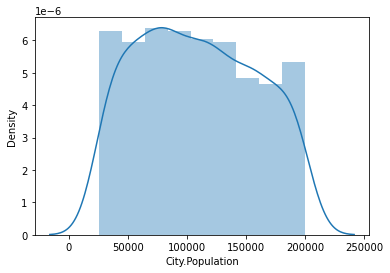

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(data["City.Population"])

<BarContainer object of 600 artists>

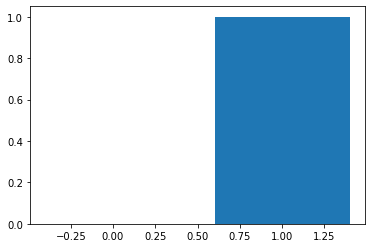

In [11]:
plt.bar(y,y.values)

In [12]:
#Now we will create random forest classification model1 with our train data
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [14]:
model1 = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=20,criterion='gini')

In [1]:
from sklearn import metrics

In [ ]:
model.fit(x_train,y_train)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

In [ ]:
Y_pred=model.predict(x_train)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [ ]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

In [ ]:
##We will apply cross validatation technique & create the model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#We will create the model applying the adaboost technique
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#Accuracy of model2
num_trees = 10
kfold = KFold(n_splits=10)
model2 = AdaBoostClassifier(n_estimators=num_trees, random_state=12)
results = cross_val_score(model3, x, y, cv=kfold)
print(results.mean())

In [ ]:
model2.fit(x_train,y_train)

In [ ]:
from sklearn import metrics

In [ ]:
Y_pred=model2.predict(x_train)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

In [ ]:
y_pred=model2.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
cm

In [ ]:
##We will create the model applying the baggingclassifier technique & evaluate accuracy of model2
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees =70
model3 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=42)
results = cross_val_score(model3, x, y, cv=kfold)
print(results.mean())

In [ ]:
model3.fit(x_train,y_train)

In [ ]:
Y_pred=model3.predict(x_train)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_train,Y_pred))

In [ ]:
y_pred=model3.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,y_pred))

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
cm

In [ ]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
kfold = KFold(n_splits=10)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, x_train, y_train, cv=kfold)
print(results.mean())

In [ ]:
ensemble.fit(x_train,y_train)

In [ ]:
Y_pred=ensemble.predict(x_test)

In [ ]:
print("accuracy:",metrics.accuracy_score(y_test,Y_pred))

In [ ]:
y_pred=ensemble.predict(x_train)

In [ ]:
cm= confusion_matrix(y_test, y_pred) 
cm

In [ ]:
#Conclusion:-We have created 4 different type of models using different techniques, we got different accuracies with respect to different models 
#Our output variable is biased so detection the fraud by using the model is so difficult 
# But we have got some good model the have good accuracy in all prospective way
#Random forest & adaboost technique is giving better resu

# ======================== The End =============================